# Step 1: Business case - Indian Domestic Flight fare prediction.
Objective of this project is to predict flight prices given the various parameters. This will be a regression problem since the target or dependent variable is the price which is continuous numeric value.

## Domain Analysis
Nowadays number of people using flights has increased significantly. It is difficult for airlines to maintain prices since prices change dynamically due to different conditions. So building an machine learning model to predict prices would be more helpful. This can help airlines by predicting what prices they can maintain. It can also help customers to predict future flight prices and plan their journey accordingly.
For many reason flight ticket price would change without any assumption, it is difficult to guess.

**Various factors affecting Flight Fare are:**
- Jet fuel price: According to Indian airlines, 40% of the operating costs is made of jet fuel which is one of the highest in the world. So increase in fuel price would end up in high hike in ticket price.
- Number of passenger: Airlines often charge higher rates when you reserve more than one seat at a time.
- Distance: The farther the distance, the more the travel time, the more expensive the flight ticket price is.
- Seasonality: There can be high price for ticket in specific season. This peak season includes such as regional festival peroids and summer or christmas vacations.
- Flight timing: In case you pick flights that fly during off-hours, you are bound to receive some ticket price perks. Some studies shows morning flights are also generally cheaper than late morning, afternoon, or evening flights. 
- Ticket booking time: Booking the tickets more days in advance, you will meet with comparatively lower ticket rates. However, if you try to book a flight just before your speculated journey, the flight ticket rates would be high.
- Flight travel type: Indirect flight with long duration are often cheaper when compared to direct flight. Also direct flights are usually cheaper than non-stop flights.
- Airline class: Ticket price varies from low to high as we choose in the order of Economy -> Premium Economy -> Business -> First class.
- Competition with other Airlines: Competition is key when it comes to fluctuations in the flight ticket prices. Since there is no monopoly in the aviation industry and many players have their own pricing system to compete with their contemporaries by providing tickets with interesting offers and discounts to help their business.

# Step 2 : Data Collection
Dataset can be available at https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh.

In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_excel('Flight_Fare.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Step 3 : Identifying the independent and dependent variable.

**Inputs(Predictors):**
   - Airline         : name of the airline.
   - Date_of_Journey : date of the journey
   - Source          : source from which the service begins.
   - Destination     : destination where the service ends.
   - Route           : route taken by the flight to reach the destination.
   - Dep_Time        : time when the journey starts from the source.
   - Arrival_Time    : Time of arrival at the destination.
   - Duration        : Total duration of the flight.
   - Total_Stops     : Total stops between the source and destination.
   - Additional_Info : Additional information about the flight
   
**Output(Responds):**
   - Price           : The price of the ticket

# Step 4 : EDA

In [2]:
## importing libraries required for visualizing data
import matplotlib.pyplot as plt
import seaborn as sb
import sweetviz as sv

## Basic checks

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Only 'Price' is numerical(integer), rest all object type.

In [5]:
## unique values in each features
data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

Features 'Airline', 'Source', 'Destination', 'Total_Stops', and 'Additional_Info' are seems to be categorical.

In [4]:
cat_feat = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

In [5]:
## checking is there any features have missing values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Features 'Route' and 'Total_Stops' have missing values

In [6]:
## Summary of Price features
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
## Summary of categorical features
data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [10]:
for col in cat_feat:
    print(data[col].value_counts(), '\n')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64 

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64 

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64 

No info                         8345
In-flight meal not included     1982
No check-in bagga

Before doing preprocessing and feature engineering, lets see can we get any insight from the data.
## Univariate analysis:

Sweetviz analysis showas that features 'Route', 'Dep_Time', 'Arrival_Time' and 'Duration' can't give better understanding when plotted graphically. 

### univariate for categorical feature

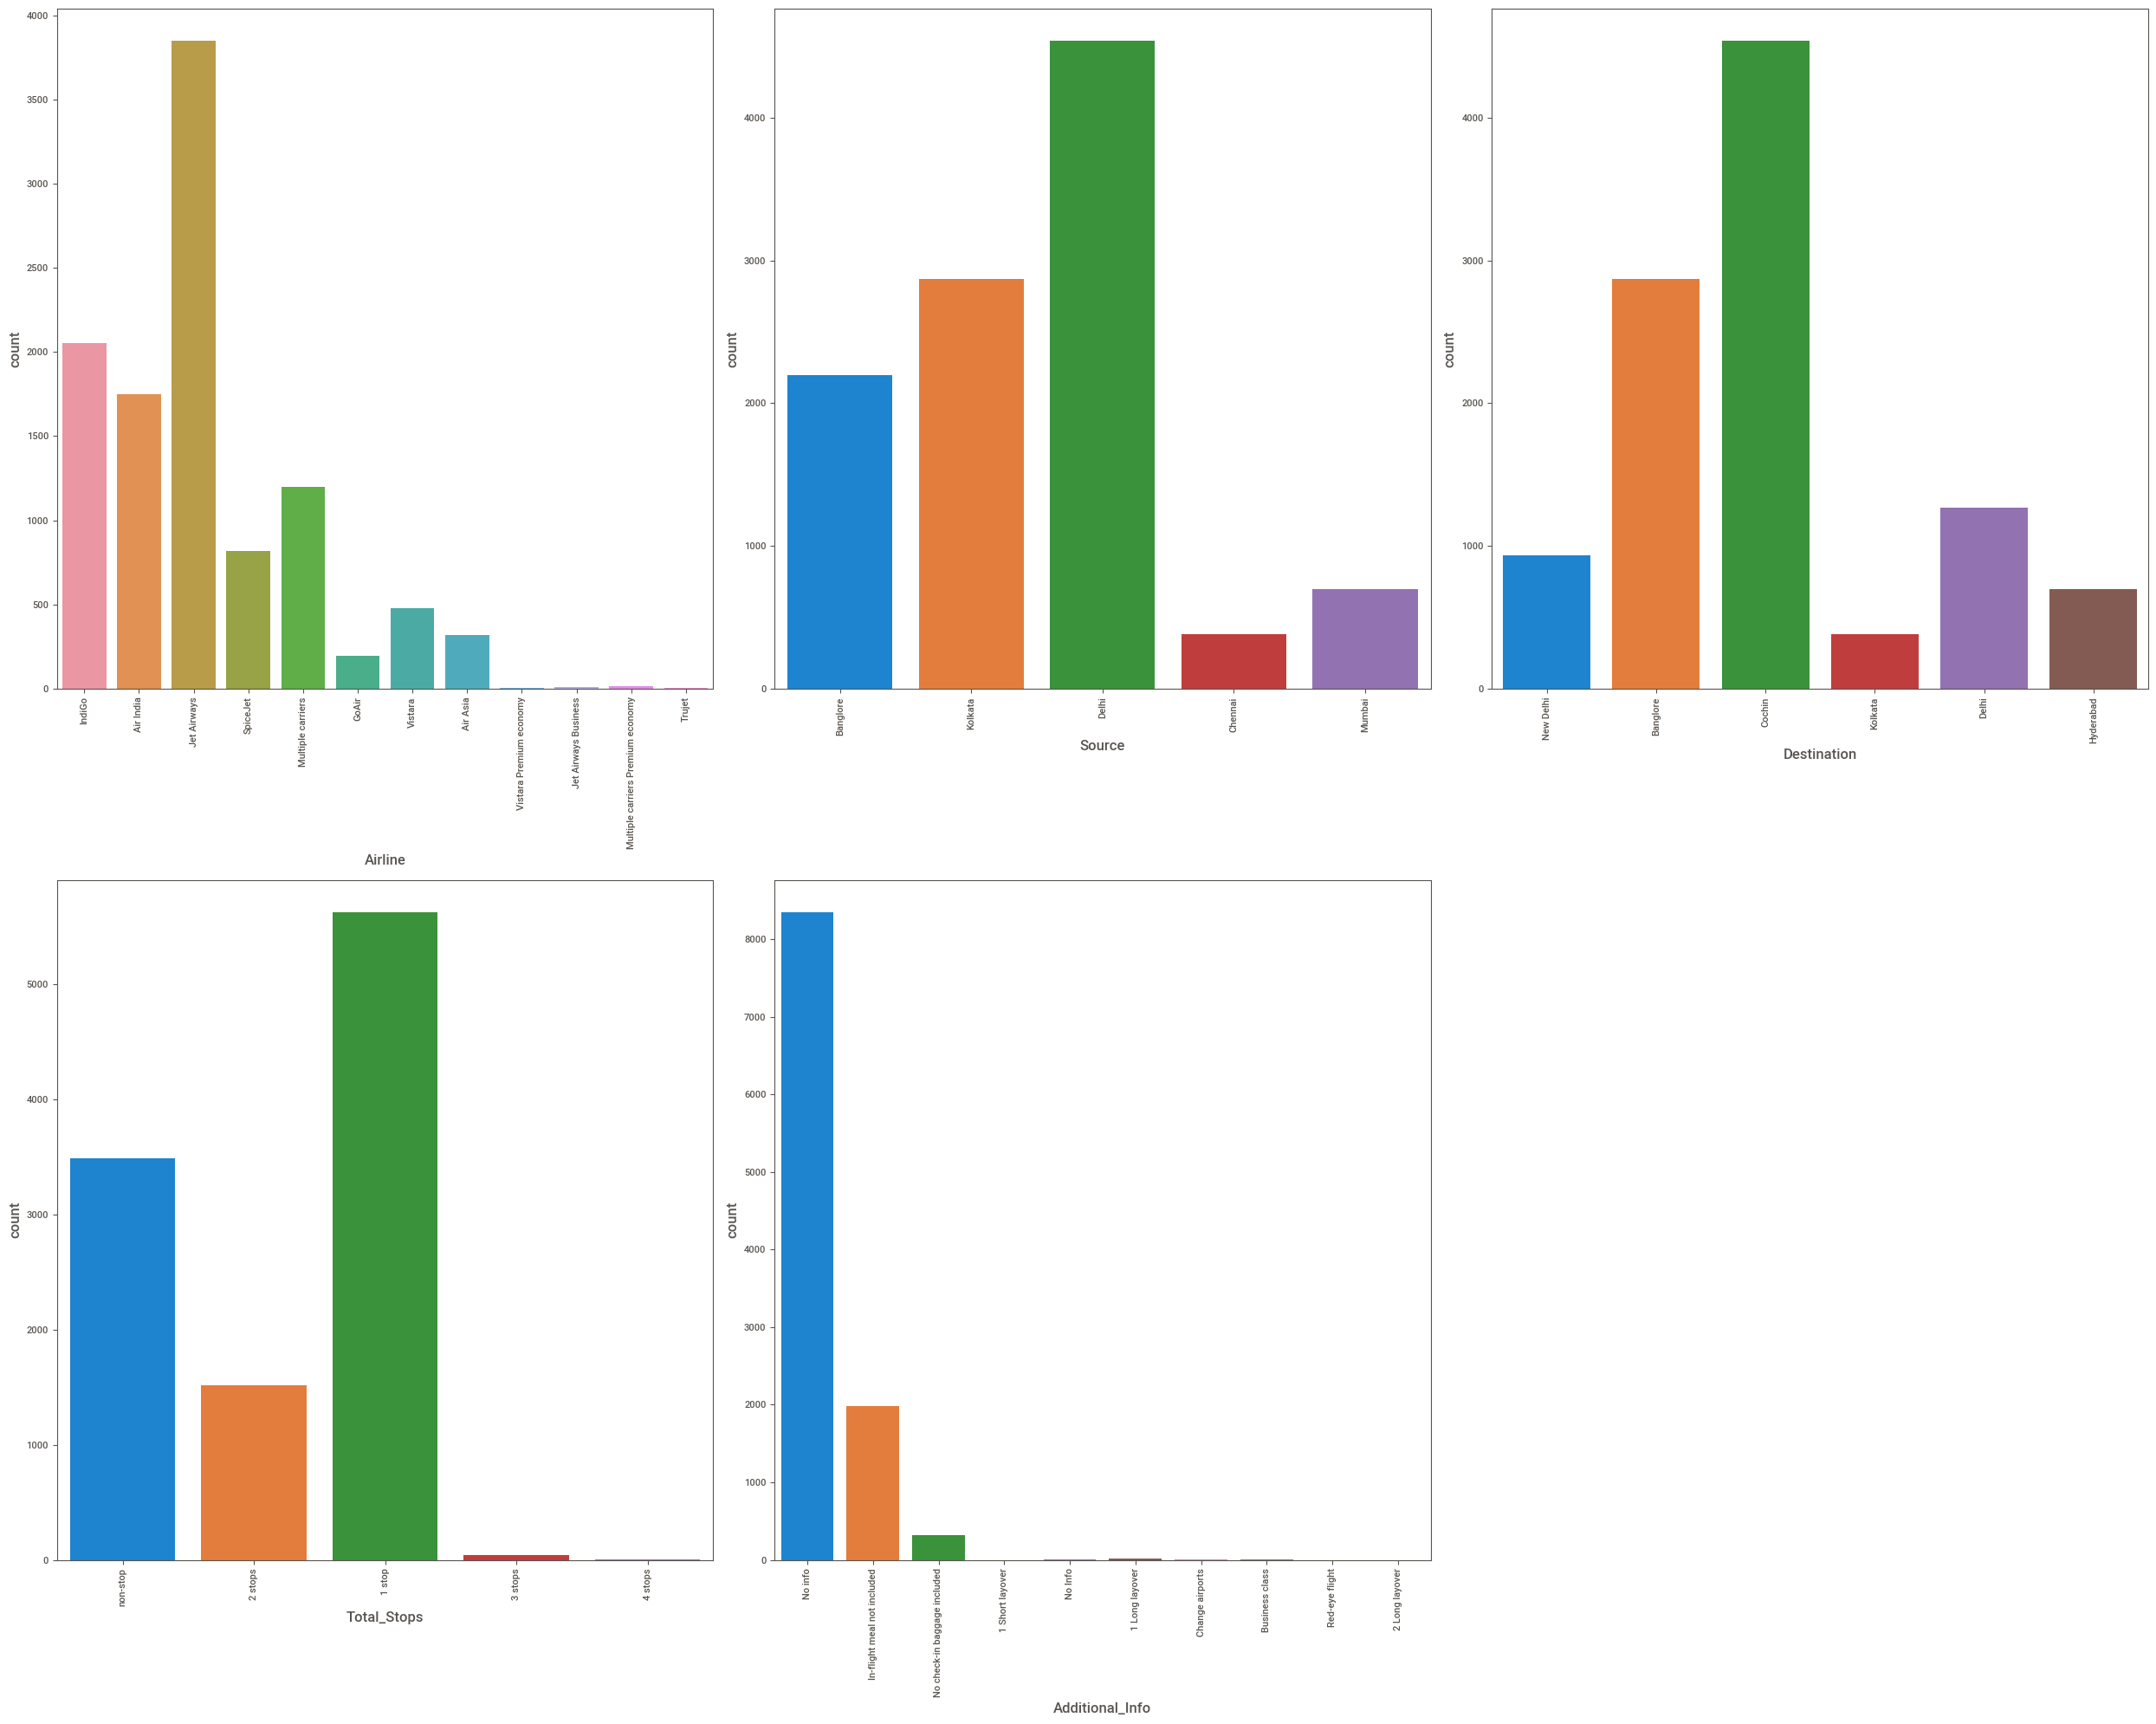

In [12]:
plt.figure(figsize=(25, 20))
size = len(cat_feat)
plt_num = 1
for col in cat_feat:
    if plt_num <= size:
        plt.subplot(2, 3, plt_num)
        sb.countplot(x=col, data=data)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('count', fontsize=12)
        plt.xticks(rotation=90)
    plt_num+=1
plt.tight_layout()

**Insights from categorical univariate plot:**
- most travellers chose 'Jet Airways' and 'Trujet' flight has minimum service(1).
- 'Delhi' is the Source of most flight and 'Chennai' has mininmun Departures. 
- Destination of most flights is 'Cochin' and 'Kolkata' has minimum arrivals.
- most flight has atleast one intermediate stop, there is one flight having four intermediate stops.
- 'Additional_Info' of most flights are unavailabel, however there are flights with not providing any 'In-flight meal' and 'check-in baggage' options.

### univariate for numerical feature 'Price'

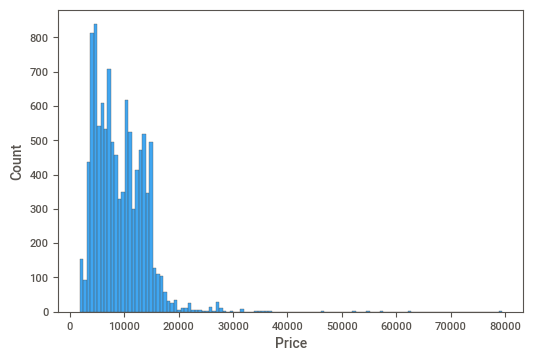

In [13]:
sb.histplot(x='Price', data=data)
plt.show()

**Insights from numerical univariate plot of 'Price':**
- plot seems like normal distribution with positive skewness
- most travelling prices are in between 1,700 to 20,000.

## Bivariate analysis:
### bivariate plot of categorical feature with reference to target 'Price'

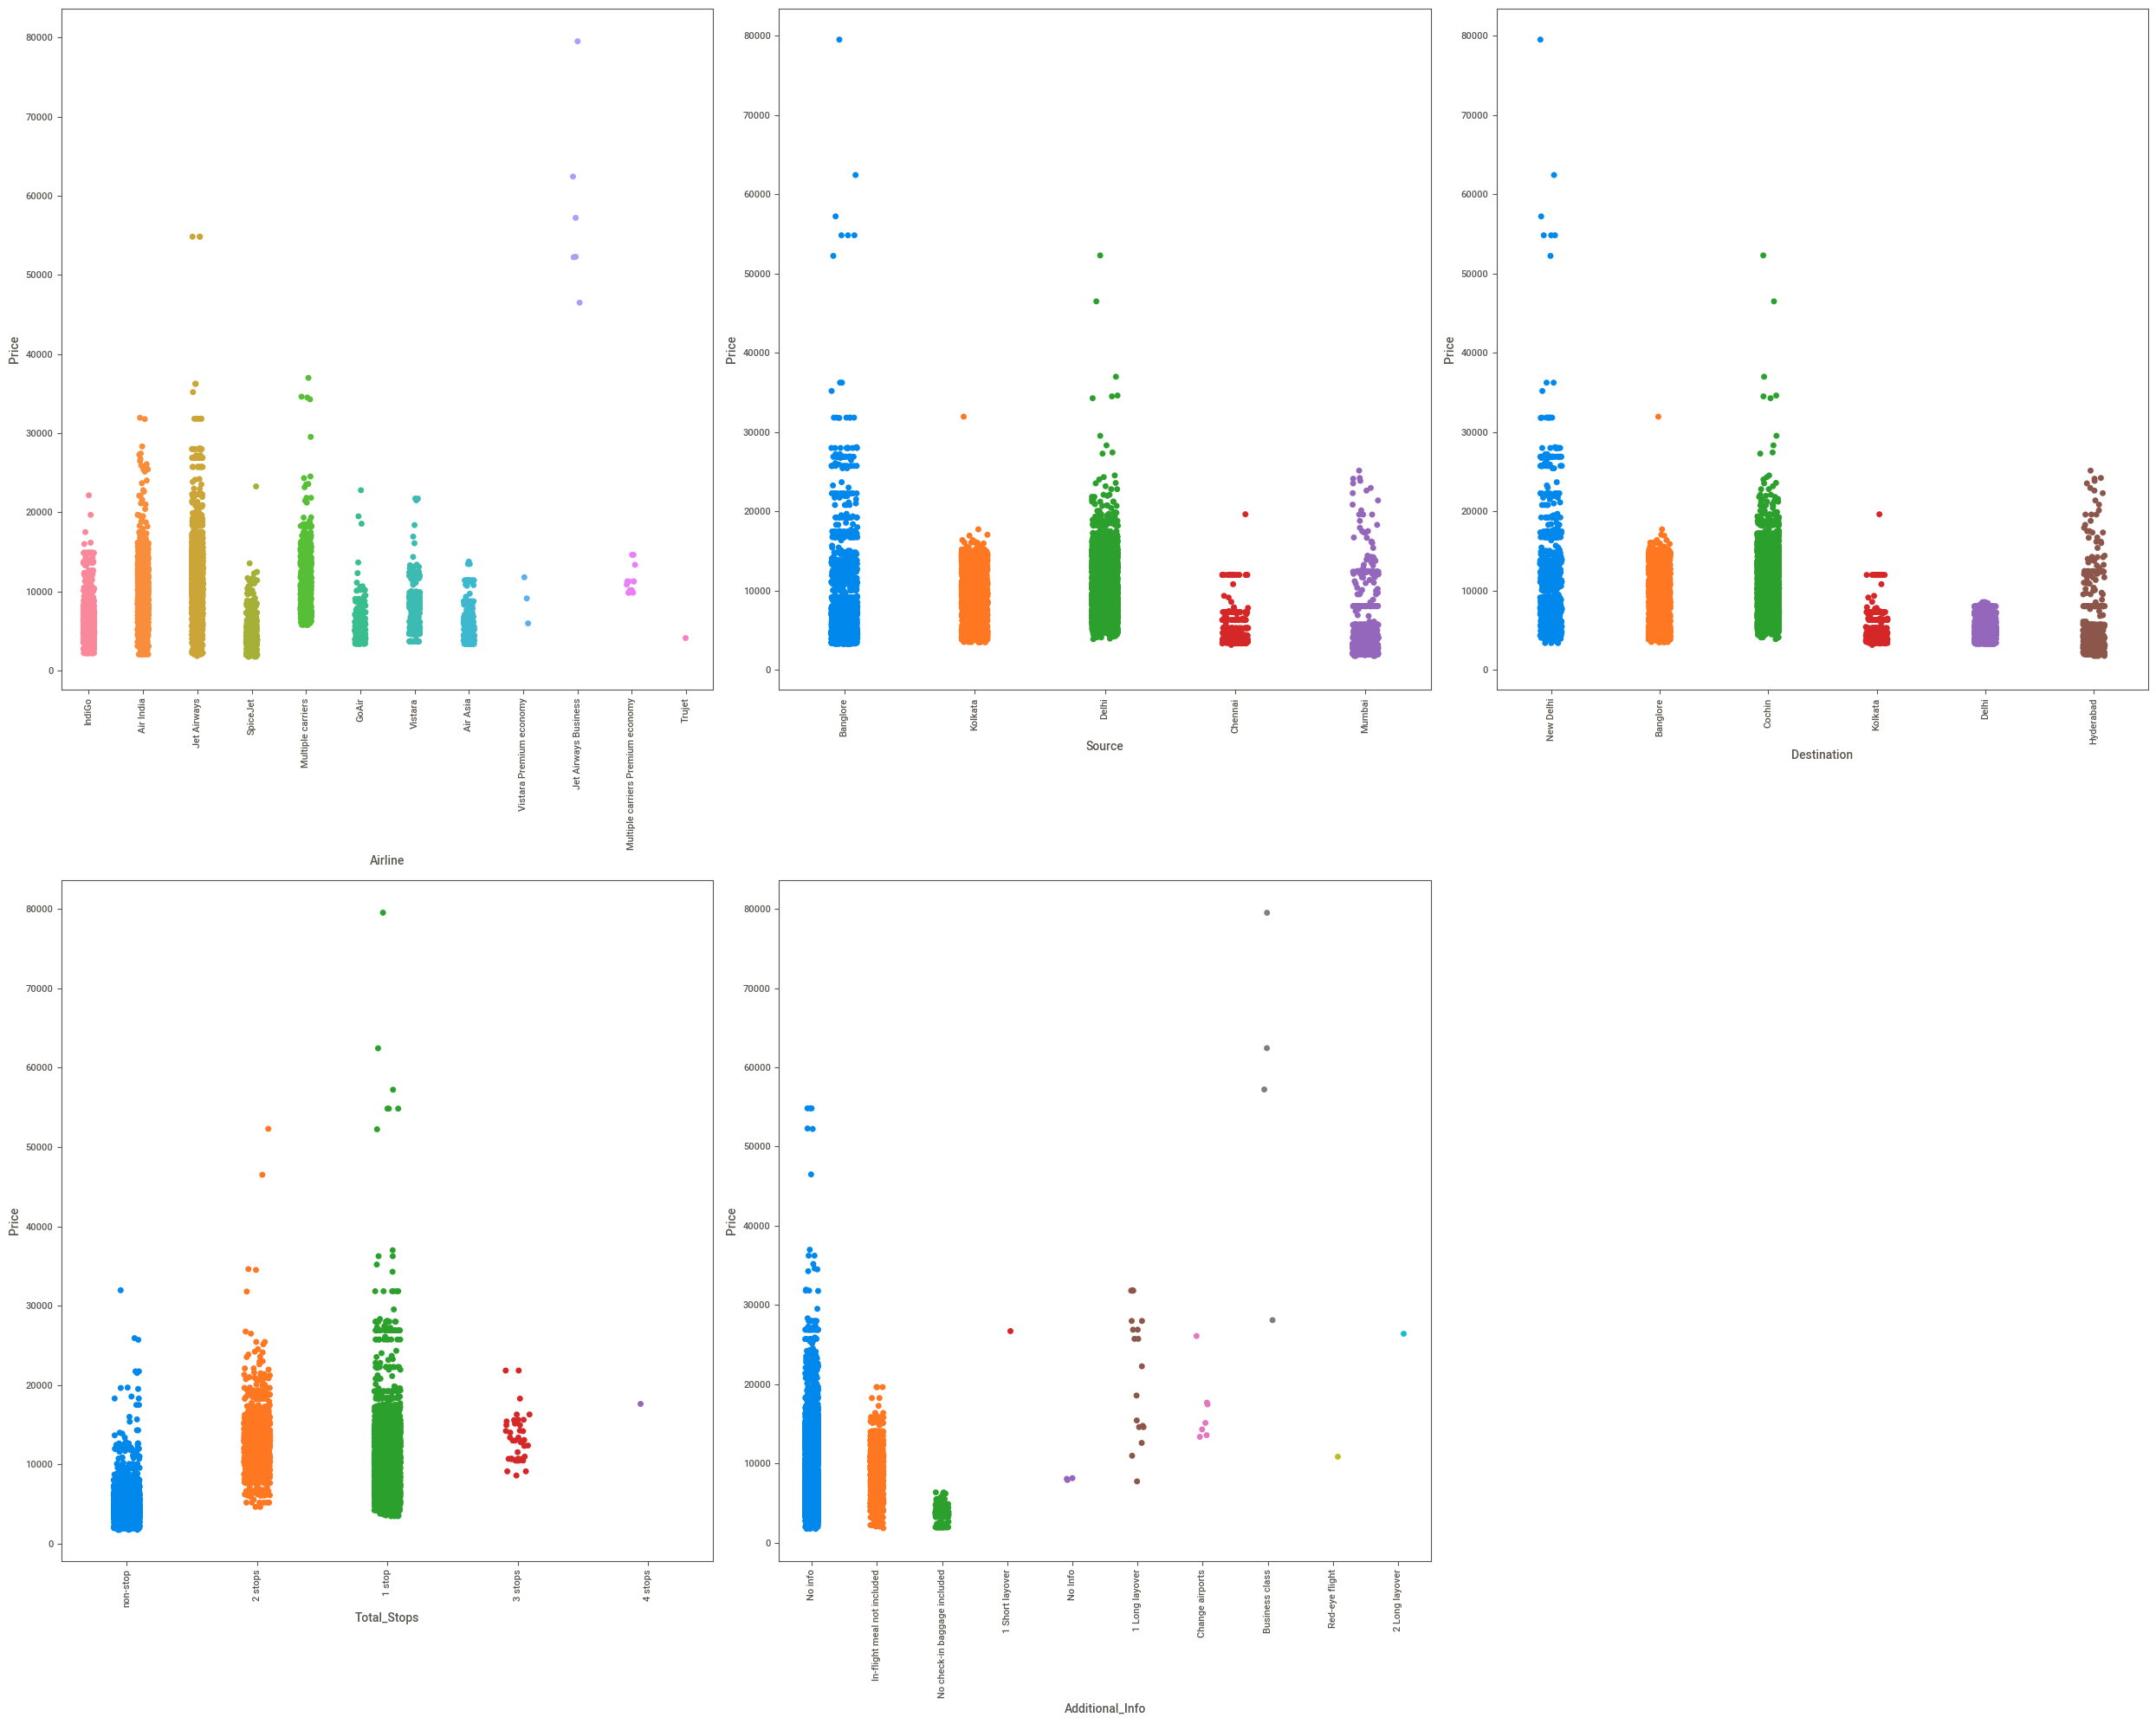

In [14]:
plt.figure(figsize=(25, 20))
plt_num = 1
size = len(cat_feat)

for col in cat_feat:
    if plt_num<=size:
        plt.subplot(2, 3, plt_num)
        sb.stripplot(x=col, y='Price', data=data)
        plt.xticks(rotation=90)
    plt_num+=1
plt.tight_layout()

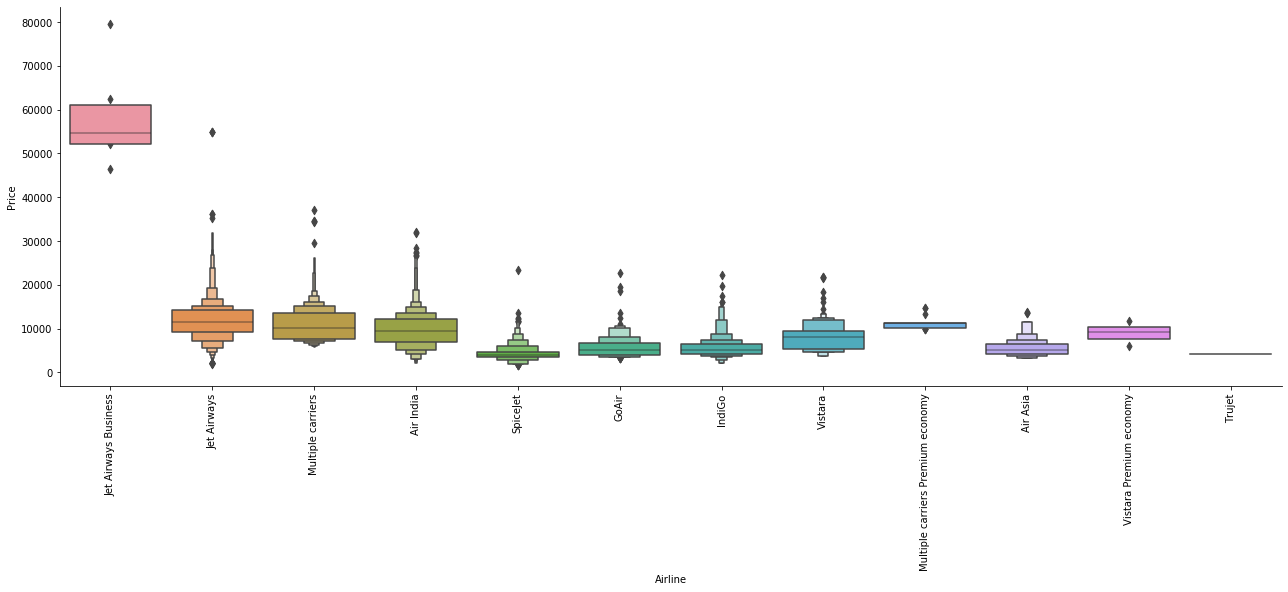

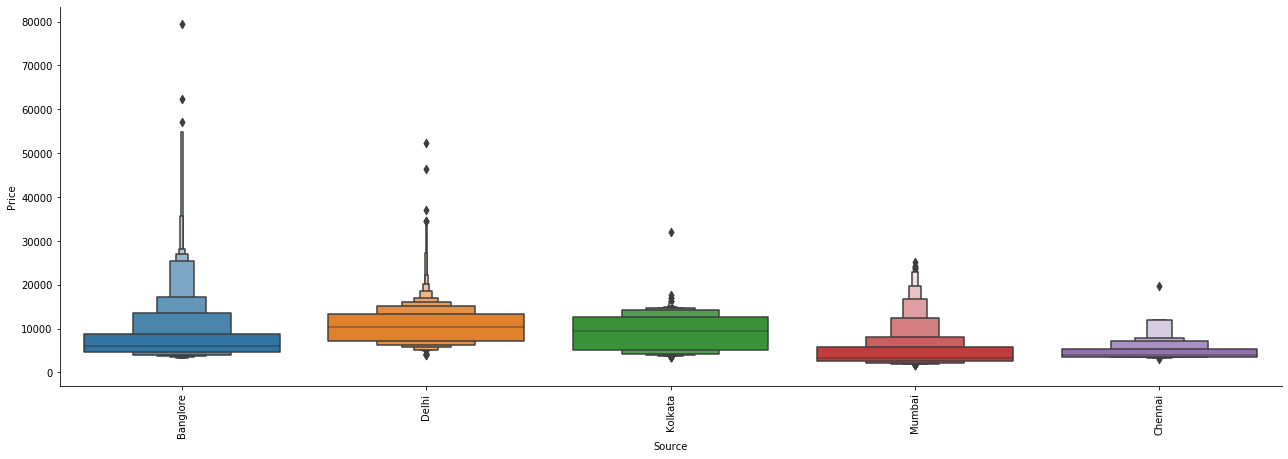

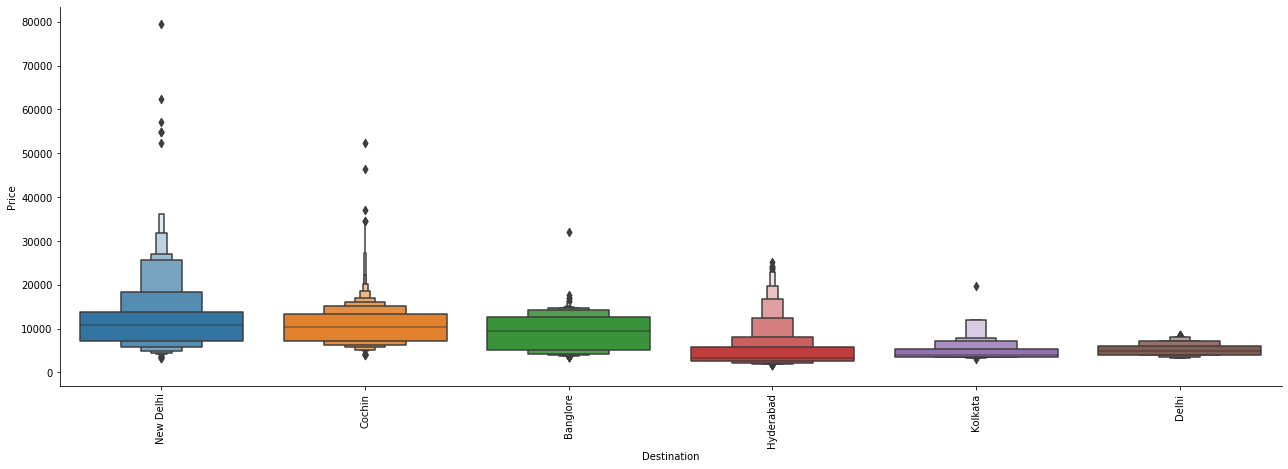

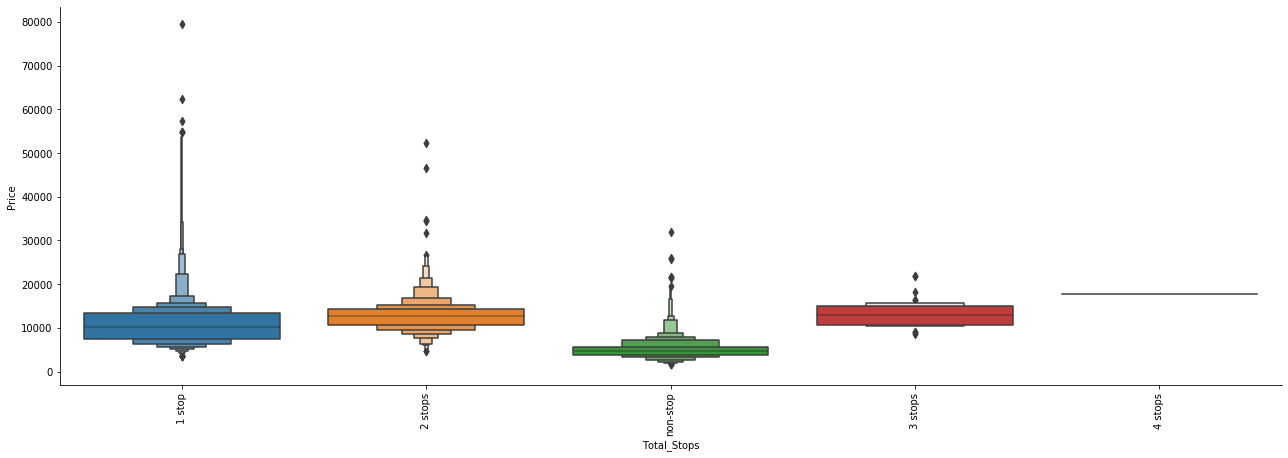

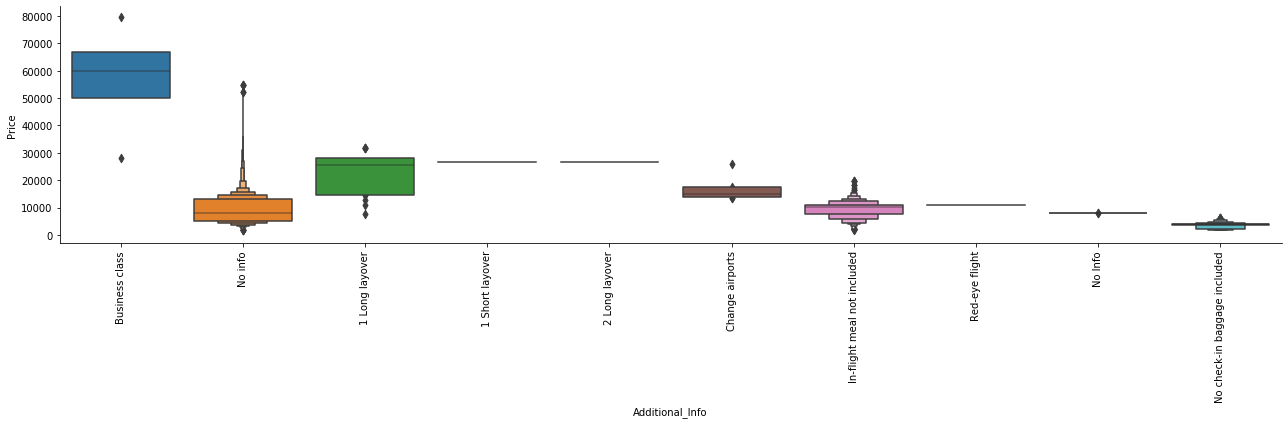

In [14]:
for col in cat_feat:
    sb.catplot(y='Price', x=col, data=data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
    plt.xticks(rotation=90)
plt.tight_layout()

As we can see the name of the airline matters. ‘JetAirways Business’ has the highest price range. Other airlines price also varies.

In [15]:
pd.set_option('display.max_rows', None)

In [16]:
data.groupby(['Price', 'Airline'], sort=True)['Airline'].min()

Price  Airline                          
1759   SpiceJet                                                      SpiceJet
1840   Jet Airways                                                Jet Airways
1965   SpiceJet                                                      SpiceJet
2017   SpiceJet                                                      SpiceJet
2050   Air India                                                    Air India
2071   Jet Airways                                                Jet Airways
2175   SpiceJet                                                      SpiceJet
2227   IndiGo                                                          IndiGo
       SpiceJet                                                      SpiceJet
2228   Jet Airways                                                Jet Airways
2385   SpiceJet                                                      SpiceJet
2437   IndiGo                                                          IndiGo
       SpiceJet        

**Insights from bivariate plot:**
- 'Jet Airways Business' fight charges high price, 'SpiceJet' has minimum charge.
- flight Depart from Banglore often charges high and Mumbai charges low.
- flight having Delhi as destination often charges high and 'Hyderabad' includes have lowest price.
- flight have atleast one stop may charge high abd non-stop may charge low price.
- Travelling in 'Business class' category charges high price.

# Step 5 : Data Preprocessing and Feature Engineering

## Removing Unwanted features
'Route' and 'Arrival_Time' variable represents same as in the feature 'Total_Stops' and 'Duration' respectively. Its says  if the flight is direct or connected and what time does the flight reached destination. Therefore can we think about droping these two, but let's see what is their effect in feature importance if dropped or not whether performance increse or not.

## Feature Engineering

Let first handle Date and Time Variables, such as 'Date_of_Journey', 'Dep_Time', 'Arrival_Time' and 'Duration'.
#### 'Date_of_Journey'
We can extract 'Journey_day' and 'Journey_Month' from the ‘Date_of_Journey’ variable. ‘Journey day’ shows the day of the month on which the journey was started.

In [6]:
data.Date_of_Journey.head()

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

In [7]:
data.Date_of_Journey.nunique()

44

In [8]:
data.Date_of_Journey.isnull().sum()

0

In [3]:
data['Date_of_Journey'] = data.Date_of_Journey.str.split('/')

data['Journey_Day'] = data.Date_of_Journey.str[0]
data['Journey_Month'] = data.Date_of_Journey.str[1]

data.drop(['Date_of_Journey'], axis=1, inplace=True)

We can ignore Journey year because all journey took place in same year.

In [4]:
## let's change data type into integer
data['Journey_Day'] = data.Journey_Day.astype('int')
data['Journey_Month'] = data.Journey_Month.astype('int')

#### 'Dep_Time'
We can extract ‘Departure_Hour’ and ‘Departure_Minute’ from ‘Dep_Time’.

In [22]:
data.Dep_Time.head()

0    22:20
1    05:50
2    09:25
3    18:05
4    16:50
Name: Dep_Time, dtype: object

In [5]:
data['Dep_Time'] = data.Dep_Time.str.split(':')

data['Dep_Hour'] = data.Dep_Time.str[0]
data['Dep_Min'] = data.Dep_Time.str[1]

data.drop(['Dep_Time'], axis=1, inplace=True)

In [6]:
## let's change data type into integer
data['Dep_Hour'] = data.Dep_Hour.astype('int')
data['Dep_Min'] = data.Dep_Min.astype('int')

#### 'Arrival_Time'
Similarly, we can create ‘Arrival_Hour and ‘Arrival_Minute’ from ‘Arrival_Time’ variables.

In [11]:
data.Arrival_Time.head()

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object

In [7]:
data['Arrival_Time'] = data.Arrival_Time.str.split(' ')
data['Arrival_Time_tmp1'] = data.Arrival_Time.str[0]

data['Arrival_Time_tmp2'] = data.Arrival_Time_tmp1.str.split(':')

data['Arrival_Day'] = data.Arrival_Time.str[1]
data['Arrival_Hour'] = data.Arrival_Time_tmp2.str[0]
data['Arrival_Min'] = data.Arrival_Time_tmp2.str[1]

data.drop(['Arrival_Time'], axis=1, inplace=True)
data.drop(['Arrival_Time_tmp1'], axis=1, inplace=True)
data.drop(['Arrival_Time_tmp2'], axis=1, inplace=True)

In [8]:
## let's change data type
data['Arrival_Min'] = data.Arrival_Min.astype('int')
data['Arrival_Hour'] = data.Arrival_Hour.astype('int')
data['Arrival_Day'] = data.Arrival_Day.astype('float') # use float, because having 'NaN' values.

#### 'Duration'
Similarly, we can create ‘Duration_Hour and ‘Duration_Minute’ from ‘Duration’ variables.

In [12]:
data.Duration.head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [9]:
data['Duration'] = data.Duration.str.split(' ')
data['Duration_hrtmp'] = data.Duration.str[0]
data['Duration_mitmp'] = data.Duration.str[1]

data['Duration_hrtmp'] = data.Duration_hrtmp.str.split('h')
data['Duration_mitmp'] = data.Duration_mitmp.str.split('m')

data['Duration_Hour'] = data.Duration_hrtmp.str[0]
data['Duration_Min'] = data.Duration_mitmp.str[0]

data.drop(['Duration'], axis=1, inplace=True)
data.drop(['Duration_hrtmp'], axis=1, inplace=True)
data.drop(['Duration_mitmp'], axis=1, inplace=True)

In [12]:
data.loc[data.Duration_Hour=='5m']

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,6,3,16,50,NaN,16,55,5m,NaN


There is one record with 'Duration_Hour' having minutes instead of hour and have 2 intermediate stops. It is not possible to have a flight within 5 minutes by covering two intermediate stops. Moreover features 'Dep_Min' and 'Arrival_Min' tells the same, we can remove this record.

In [10]:
data.drop(6474, axis=0, inplace=True)
data.loc[data.Duration_Hour=='5m']

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min


In [11]:
## let's change data type
data['Duration_Min'] = data.Duration_Min.astype('float')
data['Duration_Hour'] = data.Duration_Hour.astype('int')

In [15]:
data.describe()

,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,4335.000000,10682.000000,10682.000000,10682.000000,9651.000000
mean,9086.292735,13.509081,4.708762,12.490358,24.408819,14.315340,13.348530,24.687793,10.247051,31.356336
std,4610.885695,8.479363,1.164294,5.748819,18.767225,8.342876,6.859398,16.504203,8.495234,14.929525
min,1759.000000,1.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,5.000000
25%,5277.000000,6.000000,3.000000,8.000000,5.000000,7.000000,8.000000,10.000000,2.000000,20.000000
50%,8372.000000,12.000000,5.000000,11.000000,25.000000,13.000000,14.000000,25.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,22.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,6.000000,23.000000,55.000000,29.000000,23.000000,55.000000,47.000000,55.000000


There is no any features with constant values.

#### 'Additional_Info'

In [60]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', 'other', '1 Long layover'],
      dtype=object)

As we can see, this feature captures relevant that can affect flight price significantly. Also ‘ No Info’ values are repeated. Let’s handle that first. Then we can change some of lower times occured categorical value into s single value 'other'.

In [12]:
data.Additional_Info.replace('No Info', 'No info', inplace=True)

In [13]:
data.Additional_Info.replace({'Change airports':'other',
                              'Business class':'other',
                              'Red-eye flight':'other',
                              '1 Short layover':'other',
                              '2 Long layover':'other'}, inplace=True)

## Checking missing values

In [17]:
data.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Total_Stops           1
Additional_Info       0
Price                 0
Journey_Day           0
Journey_Month         0
Dep_Hour              0
Dep_Min               0
Arrival_Day        6347
Arrival_Hour          0
Arrival_Min           0
Duration_Hour         0
Duration_Min       1031
dtype: int64

Features 'Route', 'Total_Stops', 'Duration_Min' and 'Arrival_Day' have missing values. 

After converting 'Duration' column into hours and minutes, there are about 1031 'NaN' valued records. 
Likewise after converting 'Arrival_Time' into 'Arrival_Day', there are about 6347 'NaN' values.

### Handling 'Route' missing values

In [14]:
data.loc[data.Route.isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480,6,5,9,45,7.0,9,25,23,40.0


In [15]:
data.loc[(data.Source=='Delhi')&(data.Destination=='Cochin')&(data.Total_Stops=='1 stop'), 'Route'].value_counts()

DEL → BOM → COK    2376
DEL → HYD → COK     326
DEL → BLR → COK     232
DEL → MAA → COK     146
DEL → PNQ → COK      42
DEL → AMD → COK      25
DEL → LKO → COK      17
DEL → TRV → COK      16
DEL → BBI → COK       5
Name: Route, dtype: int64

In [16]:
data.loc[(data.Source=='Delhi')&(data.Destination=='Cochin')&(data.Total_Stops=='1 stop'), 'Route'].mode()

0    DEL → BOM → COK
dtype: object

In [17]:
data.loc[data.Route.isnull(), 'Route'] = 'DEL → BOM → COK'

In [18]:
data.loc[data.Route.isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min


### Handling 'Total_Stops' missing values

In [19]:
data.loc[data.Total_Stops.isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
9039,Air India,Delhi,Cochin,DEL → BOM → COK,NaN,No info,7480,6,5,9,45,7.0,9,25,23,40.0


In [17]:
data.Total_Stops.mode()

0    1 stop
dtype: object

This record has 'Route' 'DEL → BOM → COK', so filling null value with '1 stop'.

In [20]:
data.loc[data.Total_Stops.isnull(), 'Total_Stops'] = '1 stop'

### Handling 'Arrival_Time_Day' missing values

In [46]:
pd.reset_option('display.max_rows', None)

In [21]:
data.loc[data.Arrival_Day.isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,NaN,13,15,7,25.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,NaN,23,30,5,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,NaN,21,35,4,45.0
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,NaN,11,25,2,25.0
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,11,25,NaN,19,15,7,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,NaN,22,25,2,30.0
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,NaN,23,20,2,35.0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,NaN,11,20,3,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,NaN,14,10,2,40.0


Let's check is there any record have Dep_Hour greater than 20 hours and Duration_Hour greater than 4, which means journey exceed a day.

In [22]:
data.loc[(data.Dep_Hour>20)&(data.Duration_Hour>=4)&(data.Arrival_Day.isnull())]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
3821,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,16172,12,3,21,10,NaN,16,55,4,15.0
5309,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,6,3,21,10,NaN,16,55,4,15.0


In [22]:
data.loc[(data.Dep_Hour>20)&(data.Duration_Hour>=4)&(data.Arrival_Day.isnull()), 'Arrival_Day'] = data['Journey_Day']+1

In [23]:
data.loc[(data.Dep_Hour>20)&(data.Duration_Hour>=4)&(data.Arrival_Day.isnull())]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min


Let's see is there any other long duration travel exceed one day

In [24]:
data.loc[(data.Duration_Hour>=23)&(data.Arrival_Day.isnull())]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
2481,Air India,Banglore,New Delhi,BLR → AMD → DEL,1 stop,1 Long layover,12599,1,3,0,30,NaN,23,55,23,25.0
3067,Air India,Banglore,New Delhi,BLR → AMD → DEL,1 stop,No info,10394,3,3,0,30,NaN,23,55,23,25.0


In [25]:
data.loc[data.Arrival_Day.isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,NaN,13,15,7,25.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,NaN,23,30,5,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,NaN,21,35,4,45.0
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,NaN,11,25,2,25.0
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,11,25,NaN,19,15,7,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,NaN,22,25,2,30.0
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,NaN,23,20,2,35.0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,NaN,11,20,3,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,NaN,14,10,2,40.0


In [26]:
data.loc[data.Arrival_Day.isnull(), 'Arrival_Day'] = data['Journey_Day']

In the above analysis we found that with some exception in 'Arrival_Time' feature, it is clear that these missing values actually represent same day as flight depart, so filled it with corresponding'Journey_Day' feature values. There are two records with exception from the menstioned approch, we filled these two by adding extra one day from their respective 'Journey_Day'.

### Handling 'Duration_Min' missing values

In [27]:
data.loc[data.Duration_Min.isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,10.0,4,25,19,NaN
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,2 stops,No info,13381,12,6,20,15,13.0,19,15,23,NaN
33,Jet Airways,Delhi,Cochin,DEL → NAG → BOM → COK,2 stops,In-flight meal not included,10919,15,6,14,35,16.0,12,35,22,NaN
44,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,13062,21,3,9,0,21.0,21,0,12,NaN
53,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3943,18,6,21,15,19.0,0,15,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10591,Jet Airways,Delhi,Cochin,DEL → ATQ → BOM → COK,2 stops,No info,14300,12,6,20,0,13.0,19,0,23,NaN
10638,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,7832,21,3,21,25,19.0,11,25,14,NaN
10639,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,3 stops,No info,10493,3,6,5,15,4.0,19,15,38,NaN
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,No info,16704,27,5,13,25,28.0,4,25,15,NaN


As we can conclude that they have hours with zero minutes, so let's replace it with '0'. 

In [28]:
data.loc[data.Duration_Min.isnull(), 'Duration_Min'] = 0

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10682 non-null  object 
 4   Total_Stops      10682 non-null  object 
 5   Additional_Info  10682 non-null  object 
 6   Price            10682 non-null  int64  
 7   Journey_Day      10682 non-null  int32  
 8   Journey_Month    10682 non-null  int32  
 9   Dep_Hour         10682 non-null  int32  
 10  Dep_Min          10682 non-null  int32  
 11  Arrival_Day      10682 non-null  float64
 12  Arrival_Hour     10682 non-null  int32  
 13  Arrival_Min      10682 non-null  int32  
 14  Duration_Hour    10682 non-null  int32  
 15  Duration_Min     10682 non-null  float64
dtypes: float64(2), int32(7), int64(1), object(6)
memory usage:

## Check for Outliers
Let see is there any outliers for numerical features

In [26]:
from scipy import stats

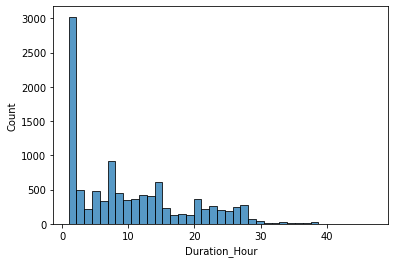

In [19]:
sb.histplot(x='Duration_Hour', data=data)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

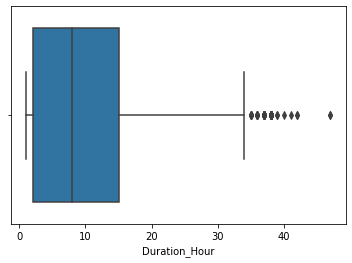

In [31]:
sb.boxplot(x='Duration_Hour', data=data)
plt.show

In [32]:
data.Duration_Hour.describe()

count    10682.000000
mean        10.247051
std          8.495234
min          1.000000
25%          2.000000
50%          8.000000
75%         15.000000
max         47.000000
Name: Duration_Hour, dtype: float64

In [27]:
# Since 'Duration_Hour' is not normally distributed, inorder to locate percentile range to impute outliers we are using IQR.
IQR = stats.iqr(data.Duration_Hour, interpolation='midpoint')
IQR

13.0

In [28]:
# define first and second quartiles
Q1 = data.Duration_Hour.quantile(0.25)
Q3 = data.Duration_Hour.quantile(0.75)
# Q3-Q1 = IQR

In [29]:
# setting limits
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [30]:
data.loc[data.Duration_Hour>upper_limit]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
226,Jet Airways,Delhi,Cochin,DEL → IDR → BOM → COK,2 stops,No info,18799,3,3,5,25,4.0,18,50,37,25.0
553,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,No info,10598,9,3,5,0,10.0,19,15,38,15.0
919,Air India,Kolkata,Banglore,CCU → BBI → IXR → DEL → BLR,3 stops,No info,10991,12,5,12,0,13.0,23,15,35,15.0
925,Jet Airways,Delhi,Cochin,DEL → DED → BOM → COK,2 stops,No info,19907,6,3,16,50,8.0,4,25,35,35.0
966,Air India,Delhi,Cochin,DEL → NAG → BOM → COK,2 stops,No info,10493,21,5,5,55,22.0,19,15,37,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9848,Air India,Banglore,New Delhi,BLR → BOM → AMD → DEL,2 stops,No info,17135,1,3,8,50,2.0,23,55,39,5.0
10020,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,No info,9653,9,5,5,0,10.0,19,15,38,15.0
10326,Air India,Banglore,New Delhi,BLR → CCU → GAU → DEL,2 stops,No info,11791,3,3,5,50,7.0,22,10,40,20.0
10456,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,No info,20694,6,3,19,10,8.0,18,50,47,40.0


It is more doubting to have a domestic flight with duration greater than 24 hours within India alone, Moreover average flight duration between Delhi to New York is lessthan 20 hours. These records must be outliers, since features 'Dep_Hour' and 'Arrival_Hour' confirm these duration so we can drop entire record.

In [31]:
outliers = data.index[data.Duration_Hour>upper_limit]
outliers

Int64Index([  226,   553,   919,   925,   966,   969,   991,  1067,  1113,
             1318,  1346,  1442,  1496,  1551,  1657,  1791,  1804,  2172,
             2553,  2641,  2654,  2718,  3457,  3496,  3790,  3815,  3966,
             4047,  4118,  4463,  4655,  4785,  5516,  5701,  5711,  5782,
             5933,  5953,  6059,  6085,  6321,  6476,  6884,  7001,  7189,
             7232,  7306,  7329,  7553,  7611,  7612,  7876,  7906,  8127,
             8153,  8360,  8409,  8412,  8601,  8621,  8698,  8729,  9247,
             9396,  9484,  9551,  9673,  9703,  9848, 10020, 10326, 10456,
            10639],
           dtype='int64')

In [32]:
data.drop(outliers, axis=0, inplace=True)

In [33]:
data.loc[data.Duration_Hour>upper_limit]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10609 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10609 non-null  object 
 1   Source           10609 non-null  object 
 2   Destination      10609 non-null  object 
 3   Route            10608 non-null  object 
 4   Total_Stops      10609 non-null  object 
 5   Additional_Info  10609 non-null  object 
 6   Price            10609 non-null  int64  
 7   Journey_Day      10609 non-null  int32  
 8   Journey_Month    10609 non-null  int32  
 9   Dep_Hour         10609 non-null  int32  
 10  Dep_Min          10609 non-null  int32  
 11  Arrival_Day      10609 non-null  float64
 12  Arrival_Hour     10609 non-null  int32  
 13  Arriva_Min       10609 non-null  int32  
 14  Duration_Hour    10609 non-null  int32  
 15  Duration_Min     10609 non-null  float64
dtypes: float64(2), int32(7), int64(1), object(6)
memory usage:

## Convert categorical to numerical
Airline, Source, Destination, 'Route', Total_Stops, Additional_info are the categorical variables we have in our data. Let’s handle each one by one. Let's apply label encoding to 'Route' and 'Total_Stops'. Apply one-hot to other features.

In [34]:
from sklearn.preprocessing import LabelEncoder

#### 'Route'

In [39]:
le = LabelEncoder()
data['Route_le'] = le.fit_transform(data['Route'])

In [43]:
data.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [42]:
data.Route_le.unique()

array([ 18,  83, 117,  90,  29,  63,   5, 103, 102, 126,  65,  96, 122,
       104,  17, 112, 118,  77, 121,  89, 110,  79, 105,  72,   3,  45,
       120,  48, 101, 115,  98, 116,  61,  28, 107, 100,  86,  60,  24,
       124,  84, 114,  81,   9, 125, 111,  66,  15,  67, 123, 109,  71,
        92,  16,  73,  30,  51,   4,  97,  27,  76,  46,  64, 119,   0,
        33,  87,  59,  94,   6,   1,  20,  36,  44,  91,  12,  62,  10,
        13,  19,  39,  53, 113,  25,  88,  69,  99,  34,  52, 108,  93,
        95,  75,   7,  74,  43,  55,   2,  70,  68,  38,  42,  32,  26,
        85,  78,  47,  40,  54,  11,  57,  35,  22,  80,  56,  21,  49,
       106,  41,  31,  82,  50,  58,  23,   8,  14,  37])

In [45]:
Route_ref = pd.DataFrame()
name = pd.Series(data['Route'].unique())
code = pd.Series(data['Route_le'].unique())
Route_ref['Route'] = name
Route_ref['Route_code'] = code
Route_ref

,Route,Route_code
0,BLR → DEL,18
1,CCU → IXR → BBI → BLR,83
2,DEL → LKO → BOM → COK,117
3,CCU → NAG → BLR,90
4,BLR → NAG → DEL,29
...,...,...
122,BOM → VNS → DEL → HYD,58
123,BLR → HBX → BOM → NAG → DEL,23
124,BLR → BOM → IXC → DEL,8
125,BLR → CCU → BBI → HYD → VGA → DEL,14


In [53]:
## save 'Route' categorical values into a dataframe so that while deploying or use externally one can use as reference to
## convert 'Route' categorical values.

Route_ref.to_csv('Route_labelencoder_ref.csv', index=False)

In [55]:
data.drop(['Route'], axis=1, inplace=True)

In [59]:
data.rename({'Route_le': 'Route'}, axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Route
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,22.0,1,10,2,50.0,18
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,1.0,13,15,7,25.0,83
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,10.0,4,25,19,0.0,117
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,12.0,23,30,5,25.0,90
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,1.0,21,35,4,45.0,29


#### 'Total_Stops'
Here, non-stop means 0 stops which means direct flight. Similarly meaning other values is obvious. We can see it is an Ordinal Categorical Data so we will use LabelEncoder here to handle this variable.

In [54]:
data.Total_Stops.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Route_le
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,22.0,1,10,2,50.0,18
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,1.0,13,15,7,25.0,83
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,10.0,4,25,19,0.0,117
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,12.0,23,30,5,25.0,90
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,1.0,21,35,4,45.0,29


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10609 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10609 non-null  object 
 1   Source           10609 non-null  object 
 2   Destination      10609 non-null  object 
 3   Total_Stops      10609 non-null  int64  
 4   Additional_Info  10609 non-null  object 
 5   Price            10609 non-null  int64  
 6   Journey_Day      10609 non-null  int32  
 7   Journey_Month    10609 non-null  int32  
 8   Dep_Hour         10609 non-null  int32  
 9   Dep_Min          10609 non-null  int32  
 10  Arrival_Day      10609 non-null  float64
 11  Arrival_Hour     10609 non-null  int32  
 12  Arrival_Min      10609 non-null  int32  
 13  Duration_Hour    10609 non-null  int32  
 14  Duration_Min     10609 non-null  float64
 15  Route            10609 non-null  int32  
dtypes: float64(2), int32(8), int64(2), object(4)
memory usage:

#### 'Airline', 'Additional_Info', 'Source' and 'Destination
Since these variable is Nominal Categorical Data we will use one-hot encoding to handle these variable.

In [63]:
data = pd.get_dummies(data, drop_first=True)

In [64]:
pd.set_option('display.max_columns', None)

In [65]:
data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Route,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_other
0,0,3897,24,3,22,20,22.0,1,10,2,50.0,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,2,7662,1,5,5,50,1.0,13,15,7,25.0,83,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,10.0,4,25,19,0.0,117,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,1,6218,12,5,18,5,12.0,23,30,5,25.0,90,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,1.0,21,35,4,45.0,29,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


## Format the data

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10609 entries, 0 to 10682
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Total_Stops                                   10609 non-null  int64  
 1   Price                                         10609 non-null  int64  
 2   Journey_Day                                   10609 non-null  int32  
 3   Journey_Month                                 10609 non-null  int32  
 4   Dep_Hour                                      10609 non-null  int32  
 5   Dep_Min                                       10609 non-null  int32  
 6   Arrival_Day                                   10609 non-null  float64
 7   Arrival_Hour                                  10609 non-null  int32  
 8   Arrival_Min                                   10609 non-null  int32  
 9   Duration_Hour                                 10609 non-null 

In [67]:
for col in data.columns:
    data[col] = data[col].astype('int')

In [68]:
## checking for any dublicate records
data.loc[data.duplicated(keep='first'), :]

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Route,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_other
683,2,13376,1,6,14,35,2,4,25,13,50,121,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1061,2,10231,21,5,22,0,22,19,15,21,15,107,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1348,2,12392,18,5,17,15,19,19,15,26,0,109,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1418,2,10368,6,6,5,30,7,4,25,22,55,115,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1674,0,7303,24,3,18,25,24,21,20,2,55,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,2,12819,27,6,23,5,28,12,35,13,30,96,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
10616,2,13014,1,6,9,40,2,12,35,26,55,115,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
10634,2,11733,6,6,9,40,7,12,35,26,55,115,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
10672,2,11150,27,6,23,5,28,19,0,19,55,96,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [69]:
## dropping duplicate records
data.drop_duplicates(keep='first', inplace=True)

In [48]:
data.loc[data.duplicated(keep='first'), :]

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_other


# Step 6: Feature Selection

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10395 entries, 0 to 10682
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Total_Stops                                   10395 non-null  int32
 1   Price                                         10395 non-null  int32
 2   Journey_Day                                   10395 non-null  int32
 3   Journey_Month                                 10395 non-null  int32
 4   Dep_Hour                                      10395 non-null  int32
 5   Dep_Min                                       10395 non-null  int32
 6   Arrival_Day                                   10395 non-null  int32
 7   Arrival_Hour                                  10395 non-null  int32
 8   Arrival_Min                                   10395 non-null  int32
 9   Duration_Hour                                 10395 non-null  int32
 10  Duration_M

### Splitting into dependent and independent train-test variables
Here split data into train and test is no prevent data leakage while checking feature importance, i.e only use train set to check feature importance.

In [89]:
X_rw = data.drop(['Price'], axis=1)
y = data.Price

In [90]:
## splitting into train and test sets
X_train_rw, X_test_rw, y_train, y_test = train_test_split(X_rw, y, test_size=0.20, random_state=42)

## Checking feature importance

In [91]:
train_set_rw = pd.concat([X_train_rw, y_train], axis=1)

In [94]:
train_set_rw.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Route,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_other,Price
1173,2,9,4,17,15,10,7,40,14,25,109,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,8052
4708,1,9,5,7,5,9,22,30,15,25,110,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,8310
10330,2,9,6,9,40,9,19,0,9,20,115,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,13014
3253,0,24,3,10,0,24,12,45,2,45,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,7276
1544,0,9,5,17,45,9,20,5,2,20,126,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,3597


### Pearson Correlation

In [92]:
train_set_rw.corr()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Day,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Route,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_other,Price
Total_Stops,1.000000,-0.018130,0.053261,-0.058479,-0.000593,0.006519,0.040073,-0.111877,0.723986,-0.138524,0.443036,0.259411,-0.071734,-0.291295,0.203912,0.023586,0.139951,0.010261,-0.275090,0.003419,-0.121361,-0.018846,-0.235468,0.472209,0.055708,-0.257607,0.472209,-0.453808,-0.257607,-0.235468,-0.004426,0.106890,-0.206226,-0.019445,0.045708,0.608449
Journey_Day,-0.018130,1.000000,-0.039542,-0.002061,-0.010244,0.997441,-0.001723,-0.014277,-0.034997,-0.013892,0.078715,-0.039091,0.005099,0.006380,-0.026731,-0.027733,0.051028,0.029187,0.026765,-0.009664,-0.006275,-0.016409,0.005278,0.096589,-0.052716,-0.018218,0.096589,0.001075,-0.018218,0.005278,-0.074370,0.033002,0.035864,-0.034402,-0.055900,-0.154265
Journey_Month,0.053261,-0.039542,1.000000,0.032569,-0.061704,-0.035984,0.013097,-0.102777,0.023983,-0.040961,0.238974,-0.039742,0.001435,-0.053643,0.057509,-0.032191,0.053331,-0.048300,-0.014874,-0.016092,-0.015777,-0.016077,0.002997,0.135448,0.091506,-0.037787,0.135448,0.086735,-0.037787,0.002997,-0.452121,0.075743,0.016062,-0.066169,-0.055783,-0.104202
Dep_Hour,-0.058479,-0.002061,0.032569,1.000000,-0.021755,0.025830,-0.003872,0.071042,0.020887,-0.024630,-0.077772,-0.014775,-0.016296,-0.030431,0.125088,0.003634,-0.157314,-0.024288,-0.010706,0.000858,0.031620,0.002569,-0.013329,-0.126689,0.161391,-0.020669,-0.126689,0.008165,-0.020669,-0.013329,-0.016483,0.066610,-0.011037,-0.056571,-0.018632,0.016463
Dep_Min,-0.000593,-0.010244,-0.061704,-0.021755,1.000000,-0.013546,0.053792,-0.022420,-0.014992,0.094748,-0.067745,-0.035363,0.088551,-0.012407,0.016575,0.000794,-0.109587,0.001192,0.085633,-0.011274,-0.076378,-0.007691,0.071940,-0.084704,-0.027241,0.034449,-0.084704,0.005620,0.034449,0.071940,0.107006,-0.014886,0.055117,-0.014419,0.025819,-0.022422
Arrival_Day,0.006519,0.997441,-0.035984,0.025830,-0.013546,1.000000,-0.032923,-0.011371,0.001960,-0.013515,0.089919,-0.032152,0.000622,-0.004108,-0.013176,-0.027499,0.045100,0.028185,0.019884,-0.010184,-0.008112,-0.017152,-0.001935,0.105552,-0.043228,-0.026597,0.105552,-0.011201,-0.026597,-0.001935,-0.078669,0.041609,0.032116,-0.040973,-0.056259,-0.136301
Arrival_Hour,0.040073,-0.001723,0.013097,-0.003872,0.053792,-0.032923,1.000000,-0.157646,0.053927,-0.106248,0.016717,0.077560,0.013661,-0.077155,-0.014644,-0.015445,0.070359,0.006339,-0.098896,0.004238,0.078239,0.005994,-0.017132,-0.007607,0.058919,-0.037081,-0.007607,-0.024239,-0.037081,-0.017132,-0.007938,-0.012715,-0.091759,0.048906,0.010545,0.022929
Arrival_Min,-0.111877,-0.014277,-0.102777,0.071042,-0.022420,-0.011371,-0.157646,1.000000,-0.077742,0.159031,-0.183235,0.076490,0.099695,0.034253,-0.066628,0.000350,-0.172909,-0.006113,0.019327,-0.003143,0.072210,0.002593,-0.034889,-0.213910,0.114501,0.085552,-0.213910,0.094401,0.085552,-0.034889,0.031279,-0.056213,-0.000494,0.051828,-0.002269,-0.091381
Duration_Hour,0.723986,-0.034997,0.023983,0.020887,-0.014992,0.001960,0.053927,-0.077742,1.000000,-0.117970,0.277345,0.241978,-0.097512,-0.341708,0.310930,-0.009147,0.008030,-0.005381,-0.265257,-0.009305,-0.016228,-0.015073,-0.188330,0.271596,0.157679,-0.235160,0.271596,-0.352918,-0.235160,-0.188330,0.016782,0.207617,-0.176119,-0.124990,0.013837,0.512114
Duration_Min,-0.138524,-0.013892,-0.040961,-0.024630,0.094748,-0.013515,-0.106248,0.159031,-0.117970,1.000000,-0.238572,-0.016433

### Heat map

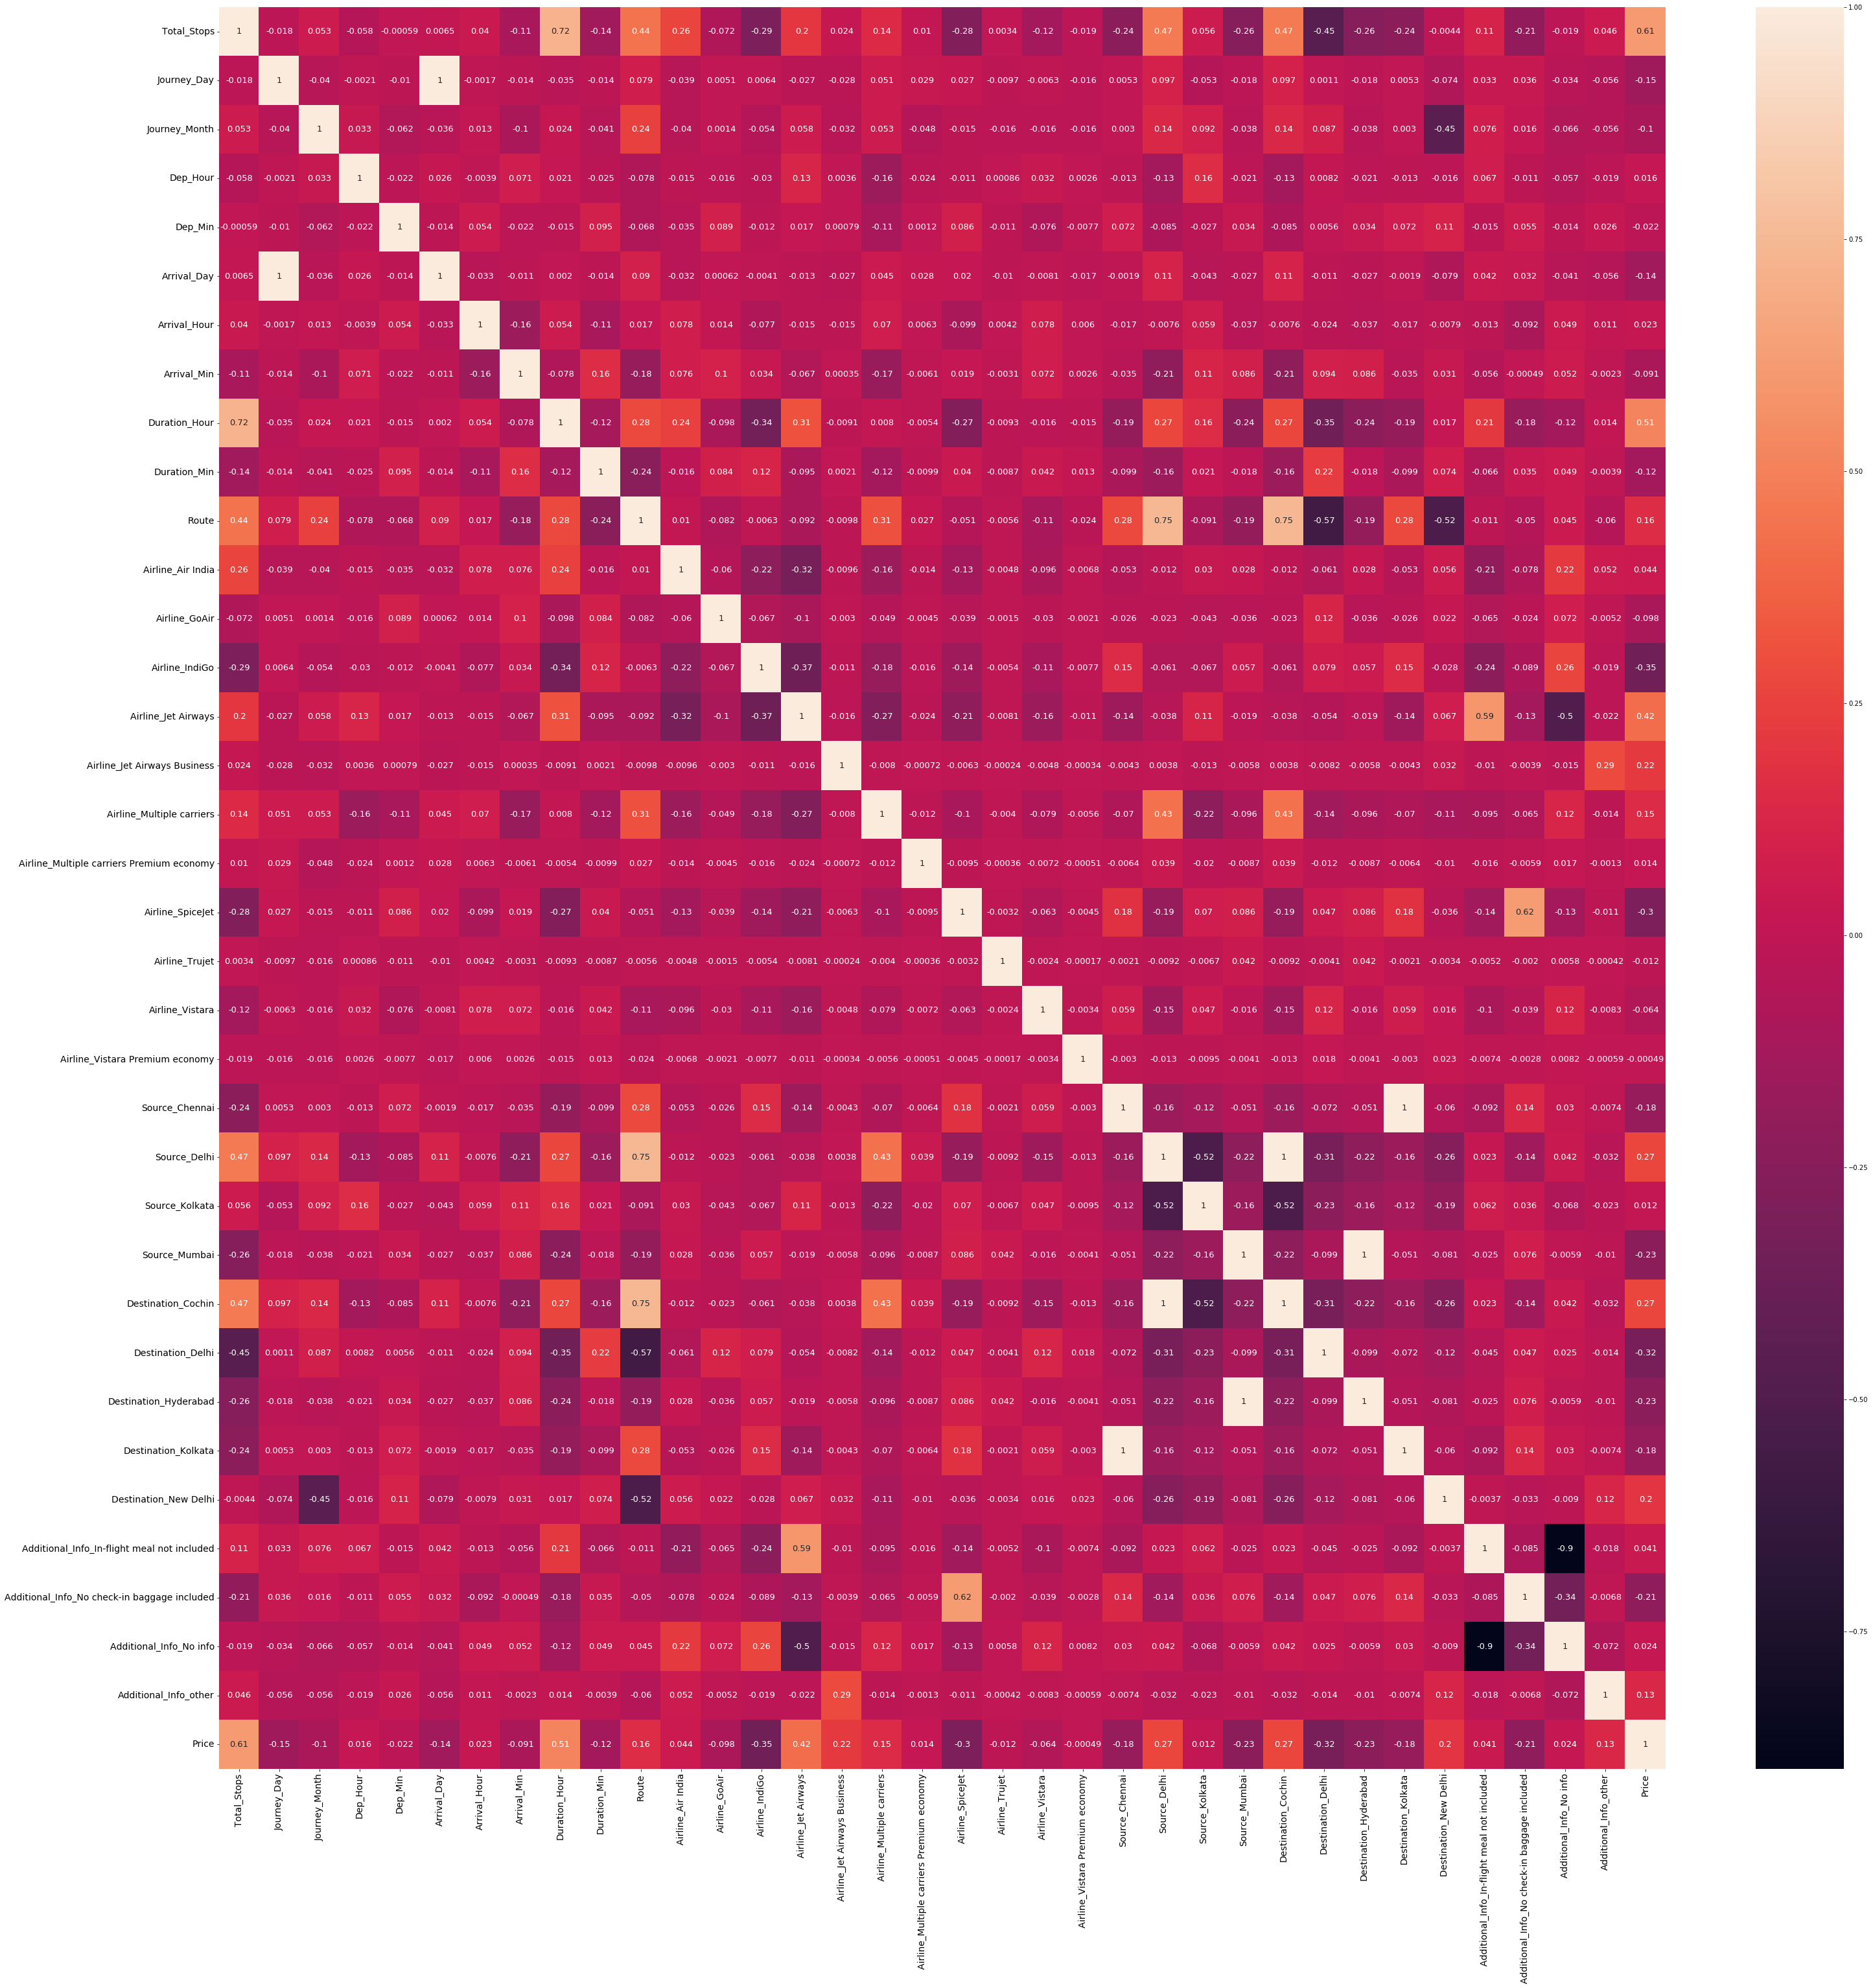

In [88]:
plt.figure(figsize=(50, 50))
sb.heatmap(train_set_rw.corr(), annot=True, annot_kws={'size':13})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Found some multi-collinearity

**Positve collinearity**
- 'Journey_Day'(vs y=-0.15)** vs 'Arrival_Day'(vs y=-0.14)
- 'Source_Chennai'(vs y=-0.18) vs 'Destination_Kolkata'(vs y=-0.18)
- 'Source_Delhi'(vs y=0.27) vs 'Destination_Cochin'(vs y=0.27)
- 'Source_Mumbai'(vs y=-0.23) vs 'Destination_Hyderabad'(vs y=-0.23)

**Negative collinearity**
- 'Additional_Info in-flight meal not included'(vs y=0.041) vs 'Additional_Info No info'(vs y=0.024)

### Checking using ExtraTrees Regressor

In [93]:
from sklearn.ensemble import ExtraTreesRegressor

In [95]:
feat_imp_model = ExtraTreesRegressor()
feat_imp_model.fit(train_set_rw.iloc[:,:-1], train_set_rw.iloc[:,-1]) # (X, y)

ExtraTreesRegressor()

In [96]:
feat_imp_model.feature_importances_

array([2.26155476e-01, 5.55972844e-02, 5.08172928e-02, 1.76066565e-02,
       1.61527836e-02, 4.72803580e-02, 1.99920034e-02, 1.41798748e-02,
       1.45970056e-01, 1.28477170e-02, 3.52151661e-02, 7.65300054e-03,
       1.24391703e-03, 1.44409593e-02, 1.18893011e-01, 4.51197126e-02,
       1.85785062e-02, 6.86705523e-04, 2.74103713e-03, 1.19833874e-04,
       4.61030122e-03, 3.86908829e-05, 4.75367560e-04, 9.70373387e-03,
       4.18742807e-03, 3.87840420e-03, 7.21853433e-03, 5.01471827e-03,
       3.25731078e-03, 3.68245725e-04, 2.17056013e-02, 8.16303681e-02,
       5.54996274e-05, 4.11105013e-03, 2.45339437e-03])

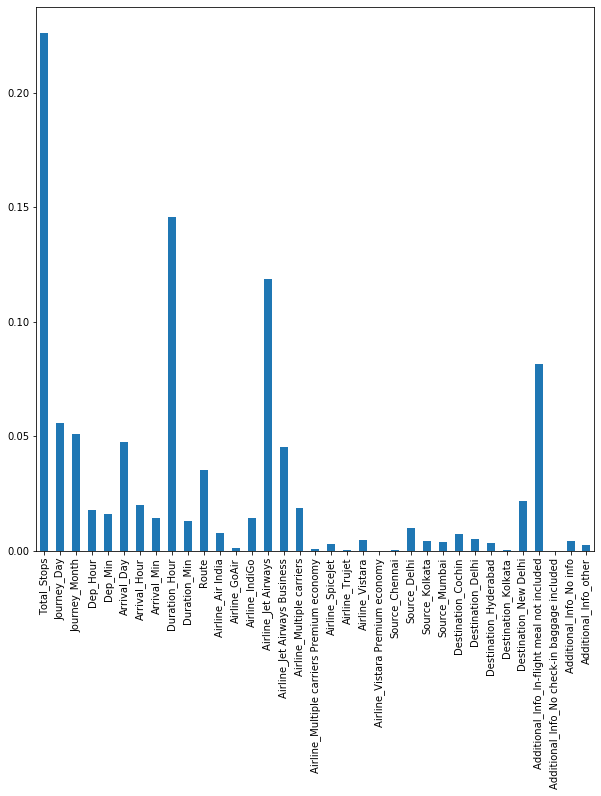

In [98]:
plt.figure(figsize=(10, 10))
feat_imp_Srs = pd.Series(feat_imp_model.feature_importances_, index=train_set_rw.columns[:-1])
feat_imp_Srs.plot(kind='bar')
plt.show()

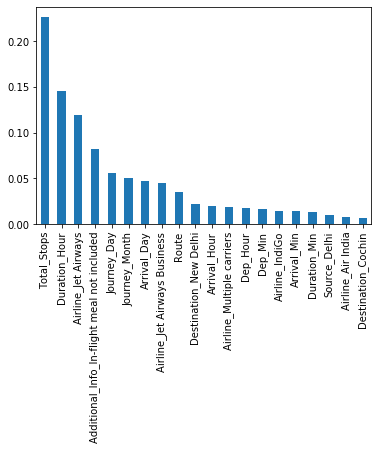

In [100]:
feat_imp_Srs.nlargest(20).plot(kind='bar')
plt.show()

From heatmap correlation one can find multi-collinearity, to avoid this drop one of highly related feature.

In [102]:
data.drop(['Arrival_Day', 'Destination_Kolkata', 'Destination_Cochin', 'Destination_Hyderabad', 'Additional_Info_No info'],
          axis=1, inplace=True)

In [103]:
data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Route,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_New Delhi,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_other
0,0,3897,24,3,22,20,1,10,2,50,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,83,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,117,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,90,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,29,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [105]:
data.shape

(10395, 31)

# Step 7: Model Selection and Building

In [5]:
X = data.drop(['Price'], axis=1)
y = data.Price

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
y_train.shape

(8316,)

## Cross-checking with algorithms

In [14]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [20]:
models = []

models.append(('RidgeR', Ridge()))
models.append(('LassoR', Lasso()))
models.append(('KNNR', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('BR', BaggingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('HGBR', HistGradientBoostingRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))

Since we include distance based algorithms in cross checking, we are using 'StandardScaler' feature normalization.

In [21]:
names = []
results = []
scoring = 'r2'

for name,model in models:
    pipeline = Pipeline(steps=[['scaler', StandardScaler()],
                              ['model', model]])
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_r2 = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_r2)
    names.append(name)
    msg = '%s: %f (%f)'%(name, cv_r2.mean(), cv_r2.std())
    print(msg)

RidgeR: 0.680222 (0.038821)
LassoR: 0.680232 (0.038803)
KNNR: 0.805217 (0.042301)
SVR: 0.042887 (0.016732)
DT: 0.818426 (0.057803)
BR: 0.874288 (0.050784)
RFR: 0.883297 (0.047267)
ETR: 0.906934 (0.022819)
ABR: 0.205004 (0.147959)
GBR: 0.819437 (0.029664)
HGBR: 0.876297 (0.040712)
XGB: 0.896920 (0.029564)
LGBM: 0.873828 (0.043619)


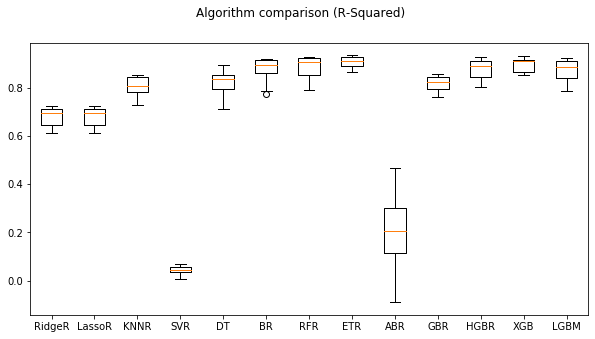

In [29]:
## Algorithm comparison
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Algorithm comparison (R-Squared)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Here, 'ExtrTreesRegressor', 'RandomForestRegressor' and 'XGBoostRegressor' have better performance.

'ExtraTreesRegressor' have high performance, have r2 score 0.907. So we focus on Hyperparameter tuning on ExtraTreesRegressor algorithm.

# Step 8: Hyperparameter tuning

In [30]:
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

While tuning parameter, we are not using feature normalization because ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

In [59]:
params = {
    'n_estimators':[575, 600,650,750,],
    'min_samples_split':[6, 7, 8, 9],
    'min_samples_leaf':[1, 2, 3, 4],
    'max_features':['auto', 'sqrt', 'log2'],
}

model = ExtraTreesRegressor()
grid_cv_etr = GridSearchCV(model, param_grid=params, scoring='r2', 
                           n_jobs=-1, cv=10, verbose=1)

grid_cv_etr.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 51.8min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 53.9min finished


GridSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [6, 7, 8, 9],
                         'n_estimators': [575, 600, 650, 750]},
             scoring='r2', verbose=1)

In [81]:
grid_cv_etr.best_score_

0.9050245824278056

In [62]:
grid_cv_etr.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 575}

### Training on Tuned parameters

In [82]:
model_tuned = ExtraTreesRegressor(n_estimators=575, min_samples_split=7)
model_tuned.fit(X_train, y_train)

ExtraTreesRegressor(min_samples_split=7, n_estimators=575)

In [110]:
y_train_pred = model_tuned.predict(X_train)

In [113]:
sqrt(mean_squared_error(y_train, y_train_pred))

773.3436429003149

In [111]:
r2_score(y_train, y_train_pred)

0.9716996102754069

In [112]:
r2 = r2_score(y_train, y_train_pred)
n = y_train.shape[0]
m = X_train.shape[1]

## ADJESTED R2_SCORE
adj_r2 = 1 - ((1-r2)*(n-1))/(n-m-1)
adj_r2

0.9715971345129762

# Step 9: Final model evaluation with test data

In [84]:
y_pred = model_tuned.predict(X_test)

In [85]:
## error
sqrt(mean_squared_error(y_test, y_pred))

1320.8881555857852

In [86]:
## R2_SCORE
r2_score(y_test, y_pred)

0.9216186492054875

In [89]:
r2 = r2_score(y_test, y_pred)
n = y_test.shape[0]
m = X_test.shape[1]

## ADJESTED R2_SCORE
adj_r2 = 1 - ((1-r2)*(n-1))/(n-m-1)
adj_r2

0.9204704848872085

In [96]:
y_test.size

2079

Let’s visualize the results of few predictions

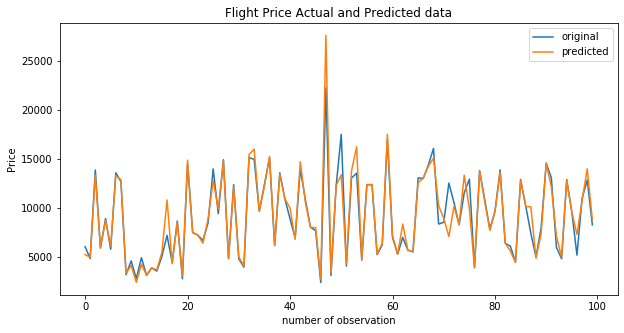

In [107]:
plt.figure(figsize=(10, 5))
num_observation = 100
x_ax = range(len(y_test[:num_observation]))
plt.title('Flight Price Actual and Predicted data')
plt.plot(x_ax, y_test[:num_observation], label='original')
plt.plot(x_ax, y_pred[:num_observation], label='predicted')
plt.xlabel('number of observation')
plt.ylabel('Price')
plt.legend()
plt.show()

### Saving model

In [108]:
import joblib

In [109]:
filename = 'etr_model.gzip'
with open(filename, 'wb') as file:
    joblib.dump(model_tuned, file, compress=('gzip', 3))

# Conclusion
We have build an regression model for Indian Domestic Flight Fare prediction. Our best optimum model for this problem is 'model_tuned' which is build on ExtraTreesRegressor ensemble algorithm. 'model_tuned' model has;

**On train set:**
- RMSE: 773.34
- R2 score: 0.9716
- Adjusted R2 score: 0.9715

**On test set:**
- RMSE: 1320.88
- R2 score: 0.9216
- Adjusted R2 score: 0.9204

Moreover ExtraTreesRegressor have standard deviation of 0.0228(found in cross-validation) which is pretty low compared to other model, This tell our model has better consistant in prediction.